### Get Data

In [1]:
import pandas as pd

In [2]:
classify1 = pd.read_csv("feature_analysis/training_classify1.csv")
classify1 = classify1.drop(columns=["Unnamed: 0"])
classify1_2 = classify1.drop(columns=["Subreddit"])

In [21]:
classify1_2

,Output,Media Type,Upvote Ratio,Subreddit Subscribers,Ups,function,pronoun,ppron,i,ipron,...,space,biden,conspiracy,pedophile,pedophiles,qanon,satanic,theory,trafficking,trump
0,0,NaN,0.94,32634,61,0.428571,0.142857,0.142857,0.142857,0.000000,...,0.142857,0,0,0,0,0,0,0,0,0
1,1,NaN,0.60,1395563,65,0.466667,0.133333,0.066667,0.000000,0.066667,...,0.066667,0,0,1,0,0,0,0,0,0
2,1,NaN,0.56,15369,1,0.423077,0.038462,0.038462,0.000000,0.000000,...,0.038462,0,0,0,0,0,0,0,0,1
3,1,youtube.com,0.77,15369,24,0.333333,0.166667,0.000000,0.000000,0.166667,...,0.166667,0,1,0,0,1,0,0,0,0
4,0,NaN,0.97,288111,573,0.478873,0.077465,0.035211,0.007042,0.042254,...,0.035211,0,0,1,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,1,NaN,0.70,15368,13,0.307692,0.051282,0.051282,0.000000,0.000000,...,0.051282,0,0,0,0,0,0,0,1,0
4064,0,NaN,1.00,32652,1,0.459770,0.100575,0.051724,0.005747,0.048851,...,0.057471,0,0,0,0,6,0,0,0,4
4065,1,NaN,0.55,15369,2,0.213483,0.022472,0.011236,0.000000,0.011236,...,0.123596,0,1,0,0,0,0,0,0,2
4066,0,NaN,1.00,32652,20,0.500000,0.125000,0.125000,0.000000,0.000000,...,0.000000,0,0,0,0,1,0,0,0,0


### Decision Tree Classifier

In [47]:
from sklearn import tree
from sklearn.model_selection import train_test_split

y = classify1_2["Output"]
X = classify1_2.drop(columns=["Output", "Media Type", 'Subreddit Subscribers'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
clf1 = tree.DecisionTreeClassifier(max_depth=10)
clf1 = clf1.fit(X_train, y_train)

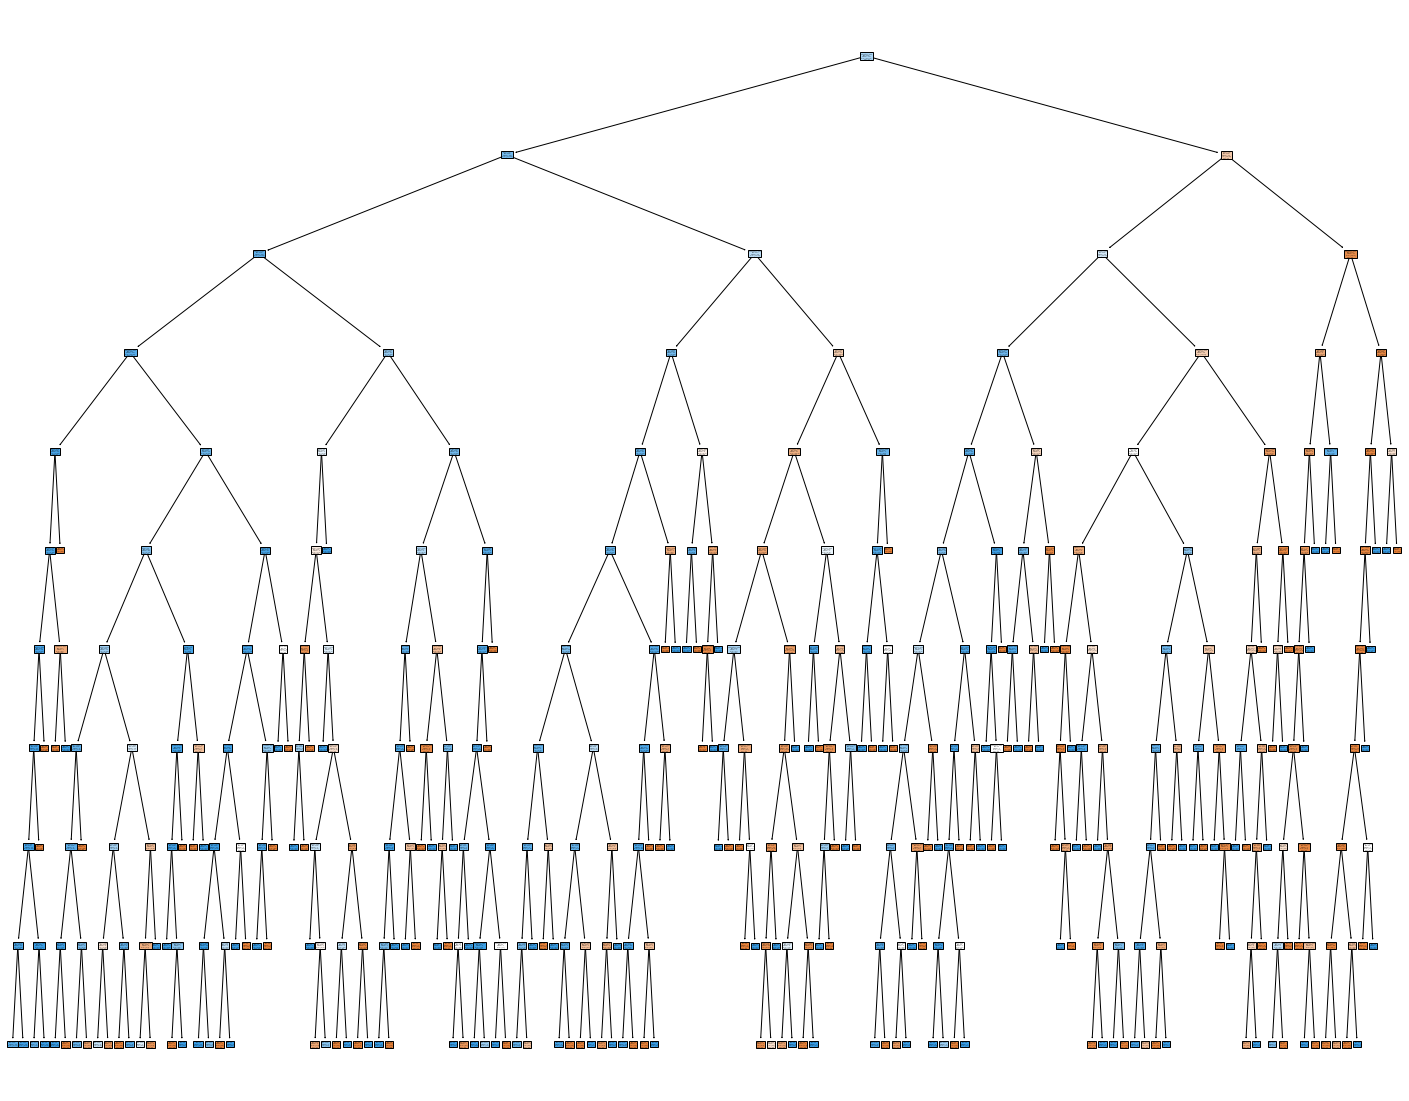

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
treefig = tree.plot_tree(clf1, 
                   feature_names=X.columns,  
                   class_names=["anti", "pro"],
                   filled=True)

In [66]:
fig.savefig("decisionTreeClassify1.png", dpi=720)

In [61]:
predictions = clf1.predict(X_test)

In [62]:
print(len(X_test), len(X_train), len(y_test), len(y_train), len(predictions))

1343 2725 1343 2725 1343


In [63]:
score = 0
for i in range(0, len(predictions)):
    if predictions[i] == list(y_test)[i]:
        score += 1
print(score/len(predictions))

0.7997021593447505


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       504
           1       0.83      0.86      0.84       839

    accuracy                           0.80      1343
   macro avg       0.79      0.78      0.78      1343
weighted avg       0.80      0.80      0.80      1343



### Ensemble Learning

### Linear SVM